In [1]:
import pandas as pd
import numpy as np
import math
from math import sin, cos, sqrt, atan2
from matplotlib import pyplot as plt
import numpy as np
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
from sklearn.feature_selection import RFECV
import warnings
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
plt.style.use('seaborn')

warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 100)

In [2]:
df=pd.read_csv('./data/survey.csv')

In [3]:
df.columns=[x.lower() for x in df.columns]

In [4]:
df.drop(list(df[df.self_employed=='Yes'].index),inplace=True)
df.drop('comments',axis=1,inplace=True)

In [5]:
df['timestamp']=[" ".join(x[:-9].split('-')).replace(" ","-") for x in df.timestamp]

In [6]:
conditions=[
    df.no_employees=="1-5",            
    df.no_employees=="6-25",         
    df.no_employees=="26-100", 
    df.no_employees=="100-500",       
    df.no_employees=="500-1000" ,           
    df.no_employees=="More than 1000",
]
choises=[
    "extra_small",
    "small",
    "medium",
    "medium_large",
    "large",
    "extra_large",
    
]
df['no_employees']=np.select(conditions,choises,default=0)

In [7]:
conditions=[
    (df["mental_health_consequence"].str.lower()=='yes'),            
    (df["mental_health_consequence"].str.lower()=='no'),
    (df["mental_health_consequence"].str.lower()=='maybe')|(df["mental_health_consequence"].str.lower()=='don\'t know')|(df["mental_health_consequence"].str.lower()=='not sure'),
]
choises=[
    1,
    0,
    1,

]
df["mental_health_consequence"]=np.select(conditions,choises,default=0)

In [8]:
df

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27,37,Female,United States,IL,NaN,No,Yes,Often,small,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,0,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27,44,M,United States,IN,NaN,No,No,Rarely,extra_large,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,1,No,No,No,No,No,Don't know,No
2,2014-08-27,32,Male,Canada,NaN,NaN,No,No,Rarely,small,No,Yes,No,No,No,No,Don't know,Somewhat difficult,0,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,medium,No,Yes,No,Yes,No,No,No,Somewhat difficult,1,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27,31,Male,United States,TX,NaN,No,No,Never,medium_large,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,0,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12,26,male,United Kingdom,NaN,No,No,Yes,NaN,medium,No,Yes,No,No,No,No,Don't know,Somewhat easy,0,No,Some of them,Some of them,No,No,Don't know,No
1255,2015-09-26,32,Male,United States,IL,No,Yes,Yes,Often,medium,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,0,No,Some of them,Yes,No,No,Yes,No
1256,2015-11-07,34,male,United States,CA,No,Yes,Yes,Sometimes,extra_large,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,1,Yes,No,No,No,No,No,No
1257,2015-11-30,46,f,United States,NC,No,No,No,NaN,medium_large,Yes,Yes,No,Yes,No,No,Don't know,Don't know,1,No,No,No,No,No,No,No


In [9]:
df.work_interfere=df.work_interfere.fillna("Missing")
df.self_employed=df.self_employed.fillna("Missing")


In [10]:
# name_list=[]
# for i in comments.comments[2].split(' '):
#     name_list.append(i)
# unique_list=list(set(name_list))

In [11]:
# name_list=[]
# for a in comments.comments:
#     for i in a.split(' '):
#         name_list.append(i)
# unique_list=list(set(name_list))
# company_dictionary={}
# for company in unique_list:
#     company_dictionary[company]=0

# for company in name_list:
#     company_dictionary[company]=company_dictionary[company]+1

In [12]:
# for x,y in company_dictionary.items():
#     company_dictionary[x]=list(y)

In [13]:
df

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27,37,Female,United States,IL,Missing,No,Yes,Often,small,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,0,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27,44,M,United States,IN,Missing,No,No,Rarely,extra_large,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,1,No,No,No,No,No,Don't know,No
2,2014-08-27,32,Male,Canada,NaN,Missing,No,No,Rarely,small,No,Yes,No,No,No,No,Don't know,Somewhat difficult,0,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27,31,Male,United Kingdom,NaN,Missing,Yes,Yes,Often,medium,No,Yes,No,Yes,No,No,No,Somewhat difficult,1,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27,31,Male,United States,TX,Missing,No,No,Never,medium_large,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,0,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12,26,male,United Kingdom,NaN,No,No,Yes,Missing,medium,No,Yes,No,No,No,No,Don't know,Somewhat easy,0,No,Some of them,Some of them,No,No,Don't know,No
1255,2015-09-26,32,Male,United States,IL,No,Yes,Yes,Often,medium,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,0,No,Some of them,Yes,No,No,Yes,No
1256,2015-11-07,34,male,United States,CA,No,Yes,Yes,Sometimes,extra_large,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,1,Yes,No,No,No,No,No,No
1257,2015-11-30,46,f,United States,NC,No,No,No,Missing,medium_large,Yes,Yes,No,Yes,No,No,Don't know,Don't know,1,No,No,No,No,No,No,No


In [14]:
north=['Canada','United States']
uk=['United Kingdom']
eu=['Germany','Ireland','Netherlands','France','Italy','Belgium','Spain','Norway']
for x in df.country.index:
    if df.country[x]in north:
        df.country[x]= "North America"
    elif df.country[x]in uk:
        df.country[x]= "United Kingdom"
    elif df.country[x]in eu:
        df.country[x]= "Europe"
    else:
        df.country[x]= 'Other'

In [15]:
df.country.value_counts()

North America     756
United Kingdom    157
Other             101
Europe             99
Name: country, dtype: int64

In [16]:
north= ['CT', 'DE', 'IL', 'IN', 'IA', 'KS', 'ME', 'MA', 'MD', 'MI', 'MN', 'MO', 'NE','NH', 'NJ', 'NY', 'ND', 'OH', 'PA', 'RI', 'SD', 'VT', 'WI','DC']

south= ['AL', 'AR', 'FL', 'GA', 'KT', 'LA', 'MS', 'NC', 'OK', 'SC', 'TN', 'TX', 'VA', 'WV', 'PR']

west= ['AK', 'AZ', 'CA', 'CO', 'HI', 'ID', 'MT', 'NV', 'NM', 'OR', 'UT', 'WA', 'WY']


for x in df.state.index:
    if df.state[x]in north:
        df.state[x]= "Northern State"
    elif df.state[x]in south:
        df.state[x]= "Southern State"
    elif df.state[x]in west:
        df.state[x]= "Western State"
    else:
        df.state[x]= 'Non US'
        

In [17]:
# could maybe do it like this to capture all gender possibilities
# make all answers lowercase
df.gender = df.gender.str.lower()
# create three lists male, female and other of all the entries
male = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "cis male"]
female = ["cis female", "f", "female", "woman", "femake", "female ","cis-female/femme", "female (cis)", "femail"]
gender_variant = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", 
     "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", 
     "female (trans)", "queer", "ostensibly male, unsure what that really means", "p", "a little about you"]
# use .loc and .isin to map male, female and gender variant to
df.gender.loc[df.gender.isin(male)] = 'male'
df.gender.loc[df.gender.isin(female)] = 'female'
df.gender.loc[df.gender.isin(gender_variant)] = 'gender_variant'

In [18]:
# Function to find outliers in Age column
def outliers(df):
    '''Takes in a dataframe and returns a list of outliers > 99th and < 1 percentile'''
    outliers = []
    for i in df:
        q1 = np.percentile(df, .5)
        q3 = np.percentile(df, 99.5)
        if i > q3 or i < q1:
            outliers.append(i)
    print("Outliers:", outliers)
    return outliers

In [19]:
age_outliers = outliers(df['age'])

Outliers: [-29, 60, 329, 58, 62, -1726, 5, 72, 60]


In [20]:
df = df.loc[~df['age'].isin(age_outliers)]

In [21]:
df=pd.get_dummies(df,columns=["no_employees",'gender','country','state','self_employed','family_history','treatment','work_interfere','remote_work','tech_company','benefits','care_options','wellness_program','seek_help','anonymity','leave','phys_health_consequence','coworkers','supervisor','mental_health_interview','phys_health_interview','mental_vs_physical','obs_consequence'],)

In [22]:
df.drop(["state_Non US",],axis=1,inplace=True)

In [23]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [24]:
df['Year'] = df['timestamp'].dt.year
df['Month'] = df['timestamp'].dt.month
df['Day'] = df['timestamp'].dt.day
df['Dow'] = df['timestamp'].dt.dayofweek

In [25]:
df.mental_health_consequence.value_counts()

1    689
0    415
Name: mental_health_consequence, dtype: int64

In [26]:
x=df.drop(['timestamp','mental_health_consequence'],axis=1)
y=df.mental_health_consequence

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=2020,test_size=0.2)

Logistic regresssion 

In [28]:
lr=LogisticRegression(class_weight='balanced')
lr.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [29]:
y_pred_lr = lr.predict(X_test)

In [30]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_lr))

0.8461538461538461


In [31]:
metrics.f1_score(y_test,y_pred_lr)

0.8768115942028984

In [32]:
coef=list(lr.coef_[0])
col=x.columns
comb={}
for i in range(len(coef)):
    comb[col[i]]=coef[i]
comb=pd.DataFrame(comb,index=[0]).T
comb.columns=['Coeficients']

In [33]:
comb=comb.sort_values(ascending=False,by='Coeficients')

In [34]:
len(y_pred_lr)

221

In [35]:
print(metrics.confusion_matrix(y_test, y_pred_lr))

[[ 66   8]
 [ 26 121]]


In [36]:
confusion = metrics.confusion_matrix(y_test, y_pred_lr)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

In [37]:
print ('True Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

True Positives: 121
True Negatives: 66
False Positives: 8
False Negatives: 26


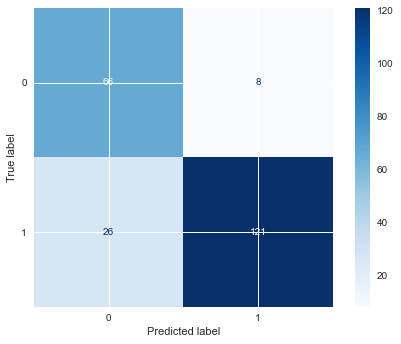

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr, X_test, y_test,cmap=plt.cm.Blues)
plt.show()

In [39]:
from sklearn.feature_selection import RFECV

lr = LogisticRegression()
selector = RFECV(estimator=lr, step=1, cv=5, scoring='f1', n_jobs=-1, verbose=1)
selector.fit(X_train, y_train)
rfe_features = x.columns[(selector.get_support())]



Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 fe

In [40]:
print(len(x.columns))
print(len(rfe_features))

76
25


In [41]:
rfe_features

Index(['country_Europe', 'country_United Kingdom', 'state_Southern State',
       'state_Western State', 'self_employed_No', 'work_interfere_Often',
       'work_interfere_Sometimes', 'tech_company_No', 'benefits_Yes',
       'seek_help_Yes', 'anonymity_No', 'leave_Somewhat difficult',
       'leave_Somewhat easy', 'leave_Very difficult', 'leave_Very easy',
       'phys_health_consequence_Maybe', 'phys_health_consequence_No',
       'phys_health_consequence_Yes', 'supervisor_No', 'supervisor_Yes',
       'mental_health_interview_No', 'mental_health_interview_Yes',
       'phys_health_interview_Yes', 'mental_vs_physical_Yes',
       'obs_consequence_No'],
      dtype='object')

In [42]:
X = df[rfe_features]
Y= y.copy()

In [43]:
lr2=LogisticRegression(class_weight="balanced")

In [44]:
X_train2,X_test2,y_train2,y_test2=train_test_split(X,Y,random_state=2020, test_size=.2)

In [45]:
lr2.fit(X_train2,y_train2)

LogisticRegression(class_weight='balanced')

In [46]:
y_predict_lr2=lr2.predict(X_test2)

In [47]:
metrics.accuracy_score(y_test2, y_predict_lr2)

0.8687782805429864

In [48]:
print(metrics.f1_score(y_test2, y_predict_lr2))
print(metrics.f1_score(y_test,y_pred_lr))

0.8953068592057761
0.8768115942028984


In [49]:
coef2=list(lr2.coef_[0])
col2=X.columns
comb2={}
for i in range(len(coef2)):
    comb2[col2[i]]=coef2[i]
comb2=pd.DataFrame(comb2,index=[0]).T
comb2.columns=['Coeficients']

In [50]:
comb2=comb2.sort_values(ascending=False,by='Coeficients')
comb2.head(10)

,Coeficients
leave_Very difficult,1.316006
phys_health_consequence_Maybe,1.079535
supervisor_No,1.030822
work_interfere_Often,1.019595
mental_health_interview_No,0.822508
anonymity_No,0.814032
phys_health_consequence_Yes,0.805782
benefits_Yes,0.761727
country_United Kingdom,0.711202
state_Southern State,0.675427


In [51]:
comb

,Coeficients
phys_health_consequence_Maybe,1.427658
supervisor_No,1.093694
mental_vs_physical_No,0.667647
leave_Very difficult,0.580770
work_interfere_Often,0.504404
...,...
phys_health_interview_No,-0.436730
leave_Very easy,-0.679206
mental_vs_physical_Yes,-0.831322
supervisor_Yes,-1.195594


In [52]:
import scipy.stats as sp
pd.crosstab(df['phys_health_consequence_Maybe'],df['mental_health_consequence'])
pd.crosstab(df['phys_health_consequence_Maybe'],df['mental_health_consequence']).apply(lambda x: x/x.sum(), axis=1)
a = pd.crosstab(df['phys_health_consequence_Maybe'],df['mental_health_consequence'],normalize=True)
c, p, dof, expected = sp.chi2_contingency(a)
print(c, p, dof)
# df['feature'],df['target']


# c = chi square test statistic
# p = p-value
# dof=degrees of freedom
# expected = expected cell counts

4.498150550921636 0.0339315335018013 1


In [53]:
a

mental_health_consequence,0,1
phys_health_consequence_Maybe,,
0,0.370471,0.412138
1,0.005435,0.211957


In [54]:
c=pd.crosstab(df['phys_health_consequence_Maybe'],df['mental_health_consequence']).apply(lambda x: x/x.sum(), axis=1)


In [55]:
c

mental_health_consequence,0,1
phys_health_consequence_Maybe,,
0,0.47338,0.52662
1,0.02500,0.97500


In [56]:
# for c in com
#     pd.crosstab(df['phys_health_consequence_Maybe'],df['mental_health_consequence'])
#     pd.crosstab(df['phys_health_consequence_Maybe'],df['mental_health_consequence']).apply(lambda x: x/x.sum(), axis=1)
#     a = pd.crosstab(df['phys_health_consequence_Maybe'],df['mental_health_consequence'])
#     c, p, dof, expected = sp.chi2_contingency(a)
#     print(c, p, dof)

SyntaxError: invalid syntax (<ipython-input-56-3b0343b0aaa9>, line 1)

In [163]:
p_value=[]
for c in comb2.index:
    d=pd.crosstab(df[c],df['mental_health_consequence']).apply(lambda x: x/x.sum(), axis=1)
    
    a=d.iloc[1,1]
    p_value.append(a)
comb2['Percentile']=p_value

[]

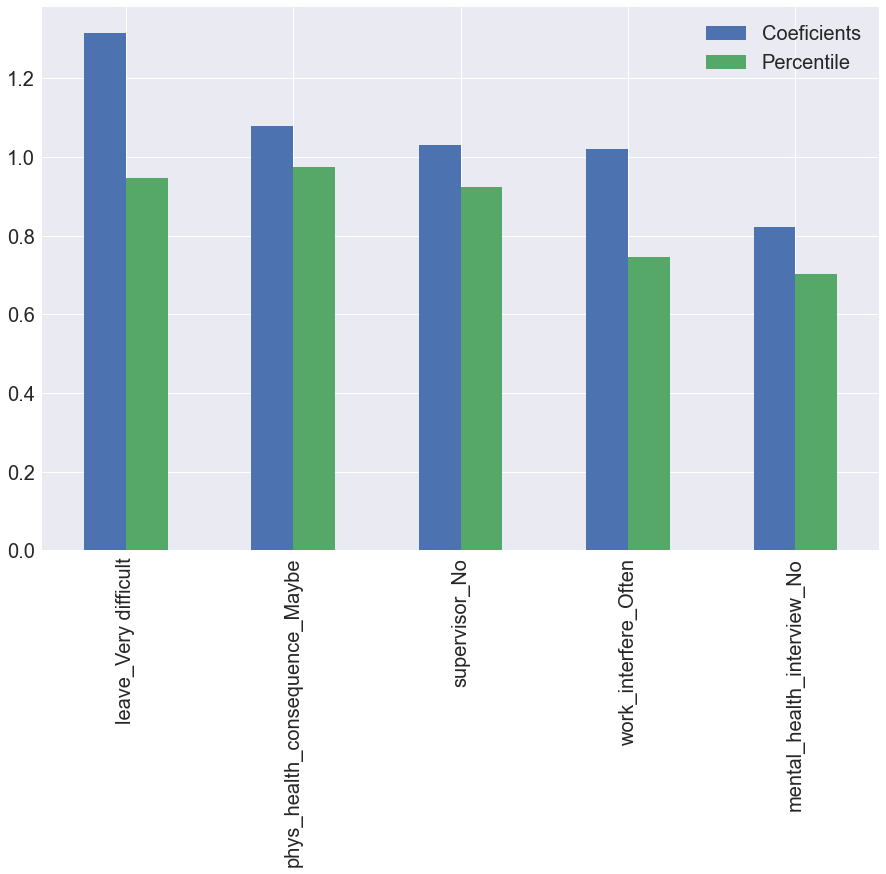

In [168]:
ax=comb2.head(5).plot(kind='bar',figsize=(15,10),fontsize=20)
#ax.set_xticklabels(["1","2","3","4","5"],rotation=0,fontsize=20)
#ax.set_yticklabels(list(range(0,16,2)),fontsize=20)
ax.legend(fontsize=20)
ax.plot()

In [113]:
# plt.bar(comb.index,comb.Coeficients,align=)
# plt.bar(comb.index,comb.Percentile,align='edge')
# plt.Figure(figsize=(30,20))
# plt.xticks(ticks=comb.index)
# plt.show()

In [145]:
# sns.catplot(x="Coeficients",y="Percentile",data=comb,kind='bar')

In [154]:
range(0,1.6)

TypeError: 'float' object cannot be interpreted as an integer

In [ ]:
comb

Gridsearch Log Regression 

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
param_grid = { 
    'C': np.logspace(-1,1,5),
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
}

In [61]:
# instantiate gridsearch
grid_log = GridSearchCV(lr, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)

In [62]:
grid_log.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    4.0s finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([ 0.1       ,  0.31622777,  1.        ,  3.16227766, 10.        ]),
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1', verbose=1)

In [63]:


# Single best score achieved across all params (min_samples_split)
print(grid_log.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_log.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_log.best_estimator_)
#Identify the best score during fitting with cross-validation



0.8532046575541342
{'C': 0.1, 'solver': 'lbfgs'}
LogisticRegression(C=0.1)


Decision Tree 

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
dtc = DecisionTreeClassifier(max_depth=5, class_weight='balanced')

dtc.fit(X_train, y_train)

dtc_preds  = dtc.predict(X_test)

dtc_f1 = metrics.f1_score(y_test, dtc_preds)

print(dtc_f1)

0.830188679245283


No RF

In [66]:
dtc = DecisionTreeClassifier(max_depth=5, class_weight='balanced')

dtc.fit(X_train, y_train)

dtc_preds  = dtc.predict(X_test)

dtc_f1 = metrics.f1_score(y_test, dtc_preds)

print(dtc_f1)

0.830188679245283


With RF

In [67]:
dt2 = DecisionTreeClassifier(class_weight='balanced')
selector2 = RFECV(estimator=dt2, step=1, cv=5, scoring='f1', n_jobs=-1, verbose=1)
selector2.fit(X_train, y_train)
rfe_features2 = x.columns[(selector.get_support())]

Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 fe

In [68]:
for i in range(25):
    if rfe_features2[i] in rfe_features:
        print(rfe_features2[i])


country_Europe
country_United Kingdom
state_Southern State
state_Western State
self_employed_No
work_interfere_Often
work_interfere_Sometimes
tech_company_No
benefits_Yes
seek_help_Yes
anonymity_No
leave_Somewhat difficult
leave_Somewhat easy
leave_Very difficult
leave_Very easy
phys_health_consequence_Maybe
phys_health_consequence_No
phys_health_consequence_Yes
supervisor_No
supervisor_Yes
mental_health_interview_No
mental_health_interview_Yes
phys_health_interview_Yes
mental_vs_physical_Yes
obs_consequence_No


In [69]:
dtc = DecisionTreeClassifier(max_depth=5, class_weight='balanced')

dtc.fit(X_train2, y_train2)

dtc_preds2 = dtc.predict(X_test2)

dtc_f1 = metrics.f1_score(y_test2, dtc_preds2)

print(dtc_f1)

0.8475836431226766


Desition Tree GS

In [70]:
param_grid = {
    'max_depth': range(1,21,1),
    'criterion':['gini', 'entropy'],
    'min_samples_split': range(1,11,1)
}

In [71]:
grid_dt = GridSearchCV(dtc, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)

In [72]:
grid_dt.fit(X_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 1985 out of 2000 | elapsed:    7.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    8.0s finished


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              max_depth=5),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 21),
                         'min_samples_split': range(1, 11)},
             scoring='f1', verbose=1)

In [73]:
print(grid_dt.best_score_)

print(grid_dt.best_params_)

print(grid_dt.best_estimator_)

0.8429441657506296
{'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}
DecisionTreeClassifier(class_weight='balanced', max_depth=2)
